## Exemple d'implémentation de la descente de gradient


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
X = np.array([3,11,6,12,8,5])
Y = np.array([11,24,17,26,20,14])

In [3]:
def f(a,b):
    c = 0
    n = len(X)
    for i,j in zip(X,Y):
        c += (j-(i*a+b))**2
    return (1/(2*n))*c
        

In [4]:
f(1,4)

27.916666666666664

In [5]:
a = np.linspace(-10,10)
b = np.linspace(-10,10)
A, B = np.meshgrid(a, b)
Z = f(A,B)

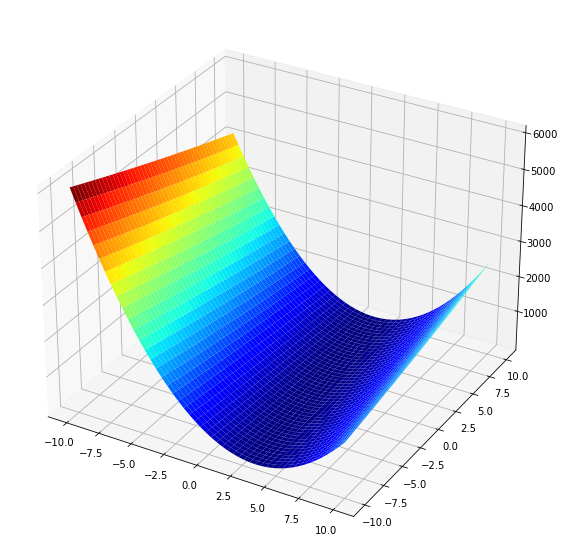

In [6]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_surface(A,B,Z,cmap='jet')
ax.grid(True)

In [7]:
def deriv_a(a,b):
    c = 0
    n = len(X)
    for i,j in zip(X,Y):
        c += (j-(i*a+b))*i
    return (-1/n)*c

def deriv_b(a,b):
    c = 0
    n = len(X)
    for i,j in zip(X,Y):
        c += (j-(i*a+b))
    return (-1/n)*c

    

In [8]:
def descente_gradient(X,Y,alpha):
    i = 0
    a = 1
    b = 4
    cos = []
    iters = []
    while True:
        c = f(a,b)
        if i%1000 == 0 :
            print(c)
        if i%100 == 0:
            cos.append(c)
            iters.append(i)
        derive_a = deriv_a(a,b)
        derive_b = deriv_b(a,b)
        if -0.0015<=derive_a<=0.0015 and -0.0015<=derive_b<=0.0015 :
            break
        a -= alpha*derive_a
        b -= alpha*derive_b
        i += 1
    return (a,b,cos,iters)
    

27.916666666666664
0.499872477901898
0.48850626427842314
0.4775167146730125
0.46685663868825145
0.45651615845040083
0.4464856922790313
0.43675594575848087
0.42731790312549
0.41816281891502777
0.4092822098565647
0.4006678470133359
0.392311748157246
0.38420617037238936
0.3763436028803311
0.36871676008046467
0.3613185747990475
0.3541421917406311
0.3471809611358121
0.3404284325794311
0.33387834905352315
0.32752464112941365
0.3213614213437136
0.3153829787428666
0.3095837735912754
0.3039584322380814
0.29850174213783426
0.2932086470204711
0.2880742422060565
0.28309377006003544
0.2782626155847084
0.2735763021428952
0.2690304873097952
0.2646209588492333
0.2603436308104978
0.25619453974223316
0.2521698410198445
0.24826580528298364
0.2444788149798597
0.24080536101514283
0.23724203949838013
0.23378554858988604
0.2304326854411896
0.2271803432272233
0.22402550826747958
0.22096525723347438
0.21799675443994748
0.2151172492172501
0.21232407336253056
0.20961463866733343
0.20698643451930487
0.20443702557

(1.6433905236830169, 6.3397377425354104)

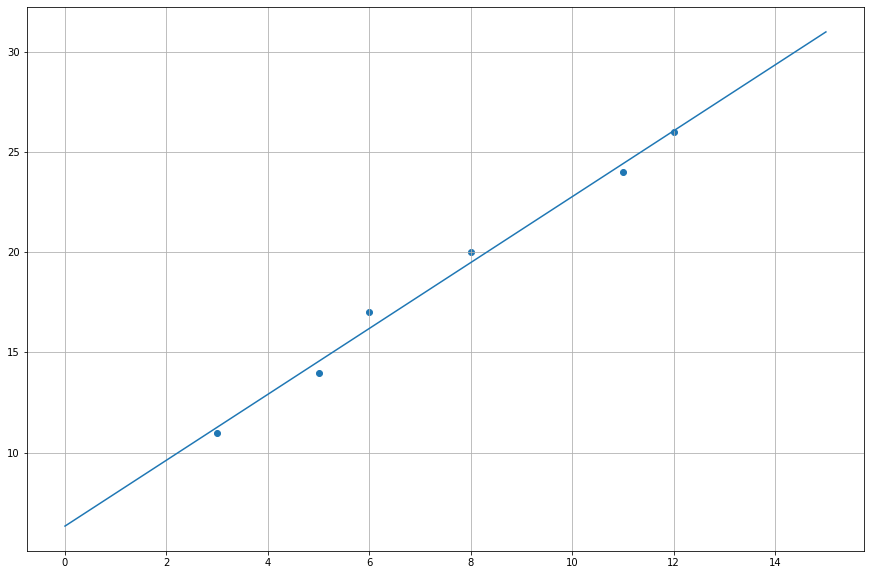

In [9]:
a,b,cos,iters = descente_gradient(X,Y,0.0001)
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
ax.scatter(X,Y)
aa = np.linspace(0,15)
bb = aa*a + b
ax.plot(aa,bb)
ax.grid(True)
(a,b)

In [10]:
f(1.6433900971738271, 6.33974151559522)

0.12195870003305276

<IPython.core.display.Javascript object>


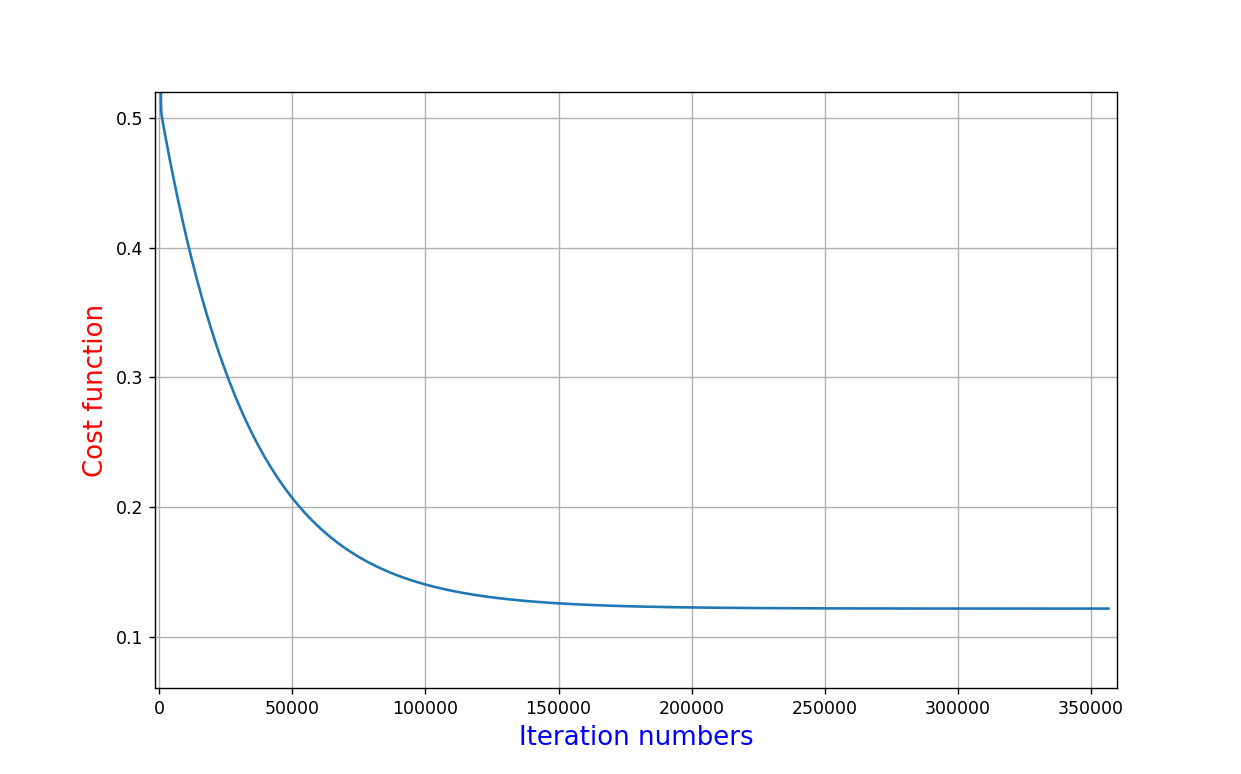

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_xlabel('Iteration numbers',fontsize=15,color='b')
ax.set_ylabel('Cost function',fontsize=15,color='r')
ax.plot(iters,cos)
ax.grid(True)
